In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# DATA_ROOT = "~/nba-3d-data/harden"
DATA_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden'

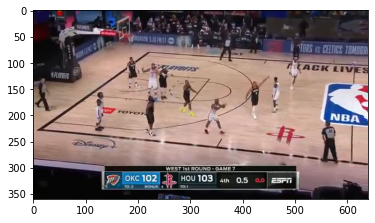

In [41]:
img = plt.imread(DATA_ROOT+'/all_frames/frame_00009.png')
plt.imshow(img)

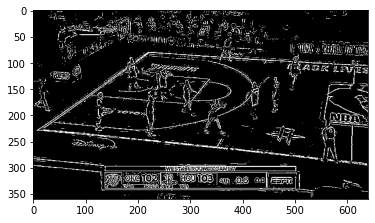

In [61]:
newimg = img.mean(axis=-1)
# newimg = img>0.3
# newimg = np.all(newimg, axis=-1)
# vkernel = np.array([[1, 0, -1],
#                    [2, 0, -2],
#                    [1, 0, -1]])
# hkernel = vkernel.transpose()
# vimg = cv2.filter2D(newimg, -1, kernel)
# newimg = cv2.filter2D(newimg, -1, kernel)
# newimg = cv2.Sobel(newimg,cv2.CV_64F,1,1,ksize=5)
newimg = cv2.Laplacian(newimg, -1) # combine laplacian with gradient TOWARDS BLACK COLOR

# newimg = cv.Canny(newimg, 0.3, 0.6)

newimg = newimg>0.1

plt.imshow(newimg, cmap='gray')

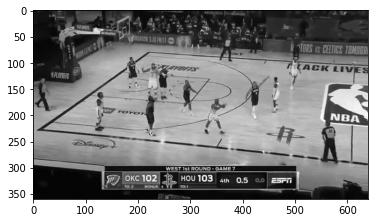

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.normalize(gray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(gray, cmap='gray')

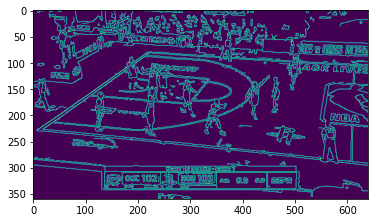

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.normalize(gray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(edges)
plt.show()

24
1


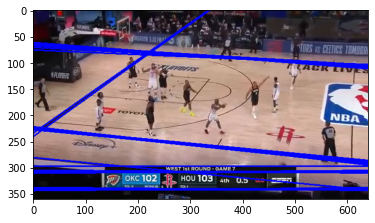

In [45]:
newimg = img.copy()

lines = cv2.HoughLines(edges,1,np.pi/360.,200)
print(len(lines))
print(len(lines[0]))
for lines_row in lines:
    for rho,theta in lines_row:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(newimg,(x1,y1),(x2,y2),(0, 0, 1.), 2)
plt.imshow(newimg)
plt.show()

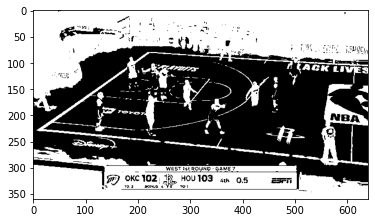

In [60]:
plt.imshow(gray<130, cmap='gray')

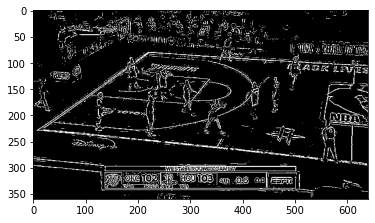

In [62]:
plt.imshow(newimg,cmap='gray')